# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [1]:
# Import the appropriate libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline 
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None 

# Create two new dataframes

north_df = pd.read_csv('NorthCallCenter.csv')
south_df = pd.read_csv('SouthCallCenter.csv')

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, make sure you answer the following questions:

1. How many reps are in each branch?
2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?
3. What is the number of calls taken for each time block?

In [2]:
# Put your EDA code here

north_df.columns


Index(['Unnamed: 0', 'Branch', 'Call Purpose', 'Time Block',
       'Incoming or Outgoing', 'Queue', 'Rep ID', 'Sale', 'Lost Call',
       'Abandoned', 'Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time',
       'During Call Wait Time', 'Calls'],
      dtype='object')

In [3]:
south_df.columns

Index(['Unnamed: 0', 'Branch', 'Call Purpose', 'Time Block',
       'Incoming or Outgoing', 'Queue', 'Rep ID', 'Sale', 'Lost Call',
       'Abandoned', 'Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time',
       'During Call Wait Time', 'Calls'],
      dtype='object')

In [4]:
north_df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


In [5]:
south_df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1


In [6]:
##Exploratory Data Analysis Question1
#South

south_df.groupby('Rep ID').sum()

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Rep ID,,,,,,,,
Alice,3637,0,0,199,46,15.0,58,20
Eric,5039,0,0,361,54,47.0,112,35
George,4620,0,0,298,53,41.0,87,29
Helga,5236,0,2,292,58,36.0,95,31
Josh,3960,3,0,260,50,31.0,83,26
Karl,4532,1,0,287,61,26.0,85,28
Kate,4615,0,0,291,61,37.0,83,29
Randy,4576,3,1,320,66,47.0,98,33
Sandy,4694,1,0,325,60,34.0,100,32


In [7]:
south_df.nunique()

Unnamed: 0               314
Branch                     1
Call Purpose               3
Time Block                 9
Incoming or Outgoing       2
Queue                      2
Rep ID                    11
Sale                       2
Lost Call                  2
Abandoned                  2
Busy Minutes               5
Not Ready Minutes          3
Incoming Wait Time         5
During Call Wait Time      3
Calls                      1
dtype: int64

In [8]:
#Exploratory Data Analysis Question1
#North
north_df.groupby('Rep ID').sum()

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Rep ID,,,,,,,,
Amanda,2666,0,1,229,43,12.0,60,23
Andy,2494,0,3,228,43,36.0,65,23
Brent,4840,0,1,362,71,17.0,117,37
Cam,2746,1,0,233,46,32.0,66,24
Duke,2999,2,0,292,56,39.0,85,29
Joe,3178,0,0,256,49,36.0,81,26
Lilly,3375,0,2,307,59,37.0,88,30
Todd,4252,1,0,296,58,21.0,97,29
Xander,3340,1,0,244,44,20.0,68,24


In [9]:
north_df.nunique()

Unnamed: 0               245
Branch                     1
Call Purpose               3
Time Block                 9
Incoming or Outgoing       2
Queue                      2
Rep ID                     9
Sale                       3
Lost Call                  2
Abandoned                  2
Busy Minutes               5
Not Ready Minutes          3
Incoming Wait Time         5
During Call Wait Time      3
Calls                      1
dtype: int64

In [10]:
#Exploratory Data Analysis Question2
#North

north_avg = ['Busy Minutes', 'Incoming Wait Time', 'During Call Wait Time']

north_df[north_avg].mean()
        

Busy Minutes             9.987755
Incoming Wait Time       3.048780
During Call Wait Time    2.967347
dtype: float64

In [11]:
#Exploratory Data Analysis Question2
#South
south_avg = ['Busy Minutes', 'Incoming Wait Time', 'During Call Wait Time']

south_df[south_avg].mean()

Busy Minutes             10.054140
Incoming Wait Time        3.000000
During Call Wait Time     3.076433
dtype: float64

In [12]:
#EDA Question 3 

north_df.groupby('Time Block').sum()

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Time Block,,,,,,,,
10:00 AM,3977,3,2,431,89,44.0,130,43
11:00 AM,2545,1,1,256,45,18.0,69,25
12:00 PM,4989,0,1,444,85,63.0,143,45
1:00 PM,1970,0,0,178,32,12.0,46,17
2:00 PM,4774,0,1,346,66,32.0,107,35
3:00 PM,4209,0,0,302,54,35.0,87,30
4:00 PM,4131,0,0,273,57,24.0,84,28
5:00 PM,3048,0,0,165,32,16.0,46,17
9:00 AM,247,1,2,52,9,6.0,15,5


In [13]:
#EDA Question 3 

south_df.groupby('Time Block').sum()

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Time Block,,,,,,,,
10:00 AM,6688,1,2,563,105,59.0,173,56
11:00 AM,4251,1,0,309,55,36.0,97,31
12:00 PM,12031,3,0,758,140,72.0,221,75
1:00 PM,3393,1,0,221,43,26.0,69,23
2:00 PM,5183,0,0,297,58,50.0,90,30
3:00 PM,7465,0,1,434,78,59.0,132,43
4:00 PM,4612,0,1,255,52,42.0,79,25
5:00 PM,4983,2,0,272,58,27.0,88,26
9:00 AM,535,3,0,48,11,7.0,17,5


### EDA Results

Make note of your results here!

1. How many reps are in each branch?   
>>>South Branch has 11 reps
North Branch has 9 reps
2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?
>>>For North Branch;
Busy Minutes               9.987755
Not Ready Minutes          1.914286
Incoming Wait Time         3.048780
During Call Wait Time      2.967347

>>>For South Branch;
Busy Minutes              10.054140
Not Ready Minutes          1.910828
Incoming Wait Time         3.000000
During Call Wait Time      3.076433

3. What is the number of calls taken for each time block?

>>>I used to groupby and sum together for finding results

## Cleaning Data

Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets:

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?
2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
3. Are there duplicates in the two data sets? If there are, how did you handle them?
4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [14]:
# Clean your data here

#Cleaning Data Question1
#North

north_df.dropna()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,77,North,Product Support,3:00 PM,Incoming,B,Duke,NO,0,0,8,3,5.0,2,1
78,78,North,Product Support,4:00 PM,Incoming,A,Cam,NO,0,0,11,2,5.0,2,1
79,79,North,Complaint,10:00 AM,Incoming,A,Joe,NO,0,0,10,2,5.0,2,1
80,80,North,Complaint,12:00 PM,Incoming,B,Lilly,NO,0,0,11,2,5.0,2,1


In [15]:
north_df.isnull().sum()

Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       163
During Call Wait Time      0
Calls                      0
dtype: int64

In [16]:
north_df.shape

(245, 15)

In [17]:
#Cleaning Data Question1
#South

south_df.dropna()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,121,South,Complaint,1:00 PM,Incoming,D,Randy,NO,0,0,10,2,5.0,4,1
122,122,South,Complaint,2:00 PM,Incoming,C,Alice,NO,0,0,11,3,5.0,3,1
123,123,South,Complaint,3:00 PM,Incoming,D,Kate,NO,0,0,10,2,5.0,3,1
124,124,South,Complaint,4:00 PM,Incoming,C,Sandy,NO,0,0,9,3,5.0,3,1


In [18]:
south_df.isnull().sum()

Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       188
During Call Wait Time      0
Calls                      0
dtype: int64

In [19]:
south_df.shape

(314, 15)

In [20]:
#Cleaning Data 2 

north_df.nunique()


Unnamed: 0               245
Branch                     1
Call Purpose               3
Time Block                 9
Incoming or Outgoing       2
Queue                      2
Rep ID                     9
Sale                       3
Lost Call                  2
Abandoned                  2
Busy Minutes               5
Not Ready Minutes          3
Incoming Wait Time         5
During Call Wait Time      3
Calls                      1
dtype: int64

In [21]:
north_df['Sale'].unique()

array(['NO', 'YES ', 'YES'], dtype=object)

In [22]:
north_df.loc[north_df.Sale == 'YES ']

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
19,19,North,Sales Support,10:00 AM,Incoming,B,Lilly,YES,0,0,11,2,2.0,4,1


In [23]:
north_df.loc[north_df.Sale == 'YES']

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
40,40,North,Sales Support,12:00 PM,Incoming,B,Lilly,YES,0,0,10,1,3.0,2,1
47,47,North,Sales Support,10:00 AM,Incoming,A,Amanda,YES,0,0,10,3,4.0,3,1
67,67,North,Sales Support,12:00 PM,Incoming,B,Todd,YES,0,0,9,3,5.0,4,1
69,69,North,Sales Support,12:00 PM,Incoming,A,Andy,YES,0,0,10,1,5.0,2,1
86,86,North,Sales Support,10:00 AM,Outgoing,B,Lilly,YES,0,1,9,3,NaN,4,1
87,87,North,Sales Support,10:00 AM,Outgoing,B,Lilly,YES,0,1,12,1,NaN,4,1
99,99,North,Sales Support,10:00 AM,Outgoing,A,Andy,YES,0,0,12,2,NaN,2,1
108,108,North,Sales Support,11:00 AM,Outgoing,B,Lilly,YES,0,0,8,3,NaN,2,1
220,220,North,Product Support,4:00 PM,Outgoing,A,Cam,YES,0,0,8,1,NaN,3,1
227,227,North,Product Support,4:00 PM,Outgoing,B,Brent,YES,0,0,10,2,NaN,4,1


In [24]:
#Cleaning Data 3 

north_duplicates = north_df.duplicated()
north_duplicates.sum()

0

In [25]:
#Cleaning Data 3 

south_duplicates = south_df.duplicated()
south_duplicates.sum()

0

In [26]:
#Cleaning Data 4 

num_rows = len(north_df.index)
low_information_cols = [] #

for col in north_df.columns:
    cnts = north_df[col].value_counts(dropna = False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1: .5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

Branch:  100.00000%
North    245
Name: Branch, dtype: int64

Sale:  95.51020%
NO      234
YES      10
YES       1
Name: Sale, dtype: int64

Lost Call:  97.95918%
0    240
1      5
Name: Lost Call, dtype: int64

Abandoned:  97.14286%
0    238
1      7
Name: Abandoned, dtype: int64

Calls:  100.00000%
1    245
Name: Calls, dtype: int64



In [27]:
num_rows = len(south_df.index)
low_information_cols = [] #

for col in south_df.columns:
    cnts = south_df[col].value_counts(dropna = False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1: .5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

Branch:  100.00000%
South    314
Name: Branch, dtype: int64

Sale:  98.08917%
NO     308
YES      6
Name: Sale, dtype: int64

Lost Call:  96.49682%
0    303
1     11
Name: Lost Call, dtype: int64

Abandoned:  98.72611%
0    310
1      4
Name: Abandoned, dtype: int64

Calls:  100.00000%
1    314
Name: Calls, dtype: int64



### Cleaning Data Results

Make note of your results!

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?
>>> Null datas correspond to outgoing calls
2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
>>>>There are totaly 11 'YES' value for sale. Just one of them is in different character.

3. Are there duplicates in the two data sets? If there are, how did you handle them?
>>>>There are no duplicates for both of data frame 
4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?
>>> When I look at the data just unnamed column is looks like unneccessary. But I want to keep it. 

## Data Manipulation

Before you begin answering any questions, combine the two datasets together to create a third dataframe called `df`. You can use this third dataframe to compare the two call centers to company-wide trends.

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.
2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
4. For each branch and the entire company, what is the average speed of answer?

In [28]:
# Manipulate data here

df = pd.merge(north_df, south_df, how='outer')

In [29]:
df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


In [30]:
df.tail()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
554,309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
555,310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
556,311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
557,312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1
558,313,South,Product Support,5:00 PM,Outgoing,D,George,NO,0,0,10,2,NaN,3,1


In [31]:
#Data Manipulation Question1
#North
north_df.groupby(['Rep ID'])['Calls'].sum().sort_values(ascending=False)

Rep ID
Brent     37
Lilly     30
Duke      29
Todd      29
Joe       26
Cam       24
Xander    24
Amanda    23
Andy      23
Name: Calls, dtype: int64

In [32]:
#South
south_df.groupby(['Rep ID'])['Calls'].sum().sort_values(ascending=False)

Rep ID
Eric      35
Randy     33
Sandy     32
Helga     31
George    29
Kate      29
Karl      28
Josh      26
Susan     26
Sharon    25
Alice     20
Name: Calls, dtype: int64

In [33]:
#Data Manipulation Question2
#north
north_abandoned = north_df['Abandoned'].sum()
north_calls = north_df['Calls'].sum()
north_pct = (north_abandoned/north_calls)*100
print(north_pct)

2.857142857142857


In [34]:
#south
south_abandoned = south_df['Abandoned'].sum()
south_calls = south_df['Calls'].sum()
south_pct = (south_abandoned/south_calls)*100
print(south_pct)

1.2738853503184715


In [35]:
#whole company
df_abandoned = df['Abandoned'].sum()
df_calls = df['Calls'].sum()
df_pct = (df_abandoned/df_calls)*100
print(df_pct)

1.9677996422182469


In [36]:
#Data Manipulation Question3
#North
north_df['Incoming Wait Time'].value_counts()

4.0    20
1.0    17
5.0    17
2.0    16
3.0    12
Name: Incoming Wait Time, dtype: int64

In [37]:
north_df['Incoming Wait Time'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

4.0    24.4%
1.0    20.7%
5.0    20.7%
2.0    19.5%
3.0    14.6%
Name: Incoming Wait Time, dtype: object

In [38]:
#South
south_df['Incoming Wait Time'].value_counts()

4.0    30
3.0    29
2.0    28
1.0    20
5.0    19
Name: Incoming Wait Time, dtype: int64

In [39]:
south_df['Incoming Wait Time'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

4.0    23.8%
3.0    23.0%
2.0    22.2%
1.0    15.9%
5.0    15.1%
Name: Incoming Wait Time, dtype: object

In [40]:
#Entire Company
df['Incoming Wait Time'].value_counts()

4.0    50
2.0    44
3.0    41
1.0    37
5.0    36
Name: Incoming Wait Time, dtype: int64

In [41]:
df['Incoming Wait Time'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

4.0    24.0%
2.0    21.2%
3.0    19.7%
1.0    17.8%
5.0    17.3%
Name: Incoming Wait Time, dtype: object

In [42]:
#Data Manipulation Question4
#North
north_df[['Busy Minutes','Incoming Wait Time','Not Ready Minutes']].mean(axis=0)

Busy Minutes          9.987755
Incoming Wait Time    3.048780
Not Ready Minutes     1.914286
dtype: float64

In [43]:

north_bm = north_df['Busy Minutes'].mean()
north_iwt= north_df['Incoming Wait Time'].mean()
north_nrm= north_df['Not Ready Minutes'].mean()
north_speed = (north_bm + north_iwt + north_nrm)/3
print(north_speed)

4.983607101377136


In [44]:
#South
south_bm = south_df['Busy Minutes'].mean()
south_iwt= south_df['Incoming Wait Time'].mean()
south_nrm= south_df['Not Ready Minutes'].mean()
south_speed = (south_bm + south_iwt + south_nrm)/3
print(south_speed)

4.988322717622081


In [45]:
#Entire Company
df_bm = df['Busy Minutes'].mean()
df_iwt= df['Incoming Wait Time'].mean()
df_nrm= df['Not Ready Minutes'].mean()
df_speed = (df_bm + df_iwt + df_nrm)/3
print(df_speed)

4.985539654144305


### Data Manipulation Results

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.
>>>>For North; 
Brent has the highest number of calls (37)
For South;
Eric has the highest number of calls (35)
2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
>>>>North; 2.85%
South; 1.27%
Whole Company; 1.96%
North is in the optimal range but the percentage of South and Whole Company are out of optimal range.

3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each company and the entire company?
>>>We can find percentage of calls when we sum of the 1.0 and 2.0 values. According to this; 
Percentage of North: 40.2%
Percentage of South: 38.1%
Percentage of Entire Company: 39%

4. For each branch and the entire company, what is the average speed of answer?
>>>>North Branch Average Speed; 4.983 Seconds
South Branch Average Speed; 4.988 Seconds
Entire Company Average Speed; 4.985 Seconds


## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why.

1. What is the average abandonment rate per queue?
2. What is the service level and average speed of answer per each rep?
3. For each type of call purpose, how many calls are outgoing vs. incoming?

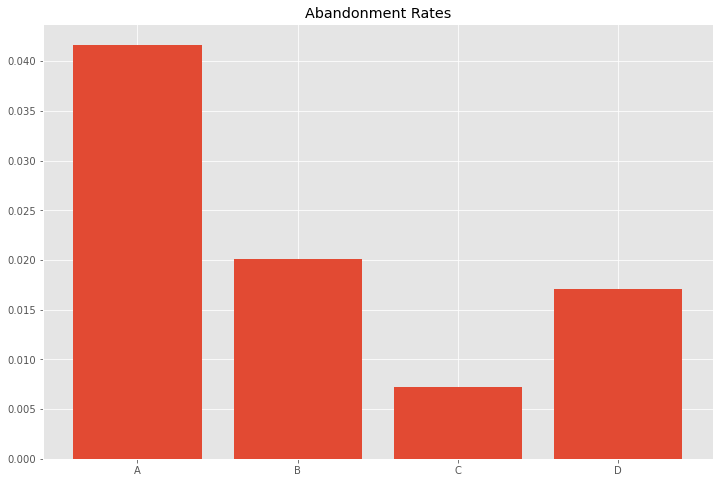

In [46]:
# Create visualization 1 here
# The dictionary abandonment_rates has the data you need.

abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 
    
branch_queue = list(abandonment_rates.keys())  
rates = list(abandonment_rates.values())
x = np.array(branch_queue)
y = np.array(rates)
plt.title("Abandonment Rates")
plt.bar(x,y)
plt.show()



<AxesSubplot:xlabel='Rep ID', ylabel='Incoming Wait Time'>

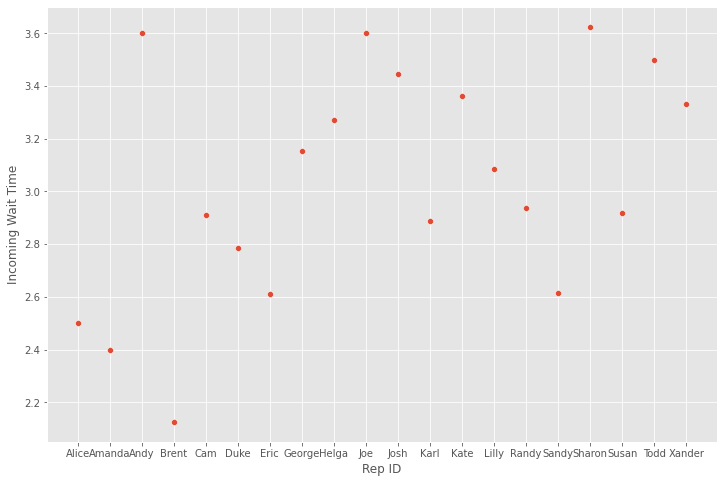

In [47]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = df[df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100


sns.scatterplot(data=north_plt, x="Rep ID", y="Incoming Wait Time")



{'Outgoing': 123, 'Incoming': 75}
{'Outgoing': 228, 'Incoming': 82}


ValueError: could not convert string to float: 'Complaint'

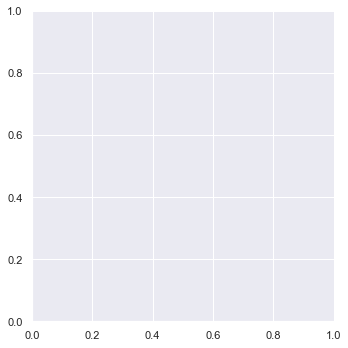

In [72]:
# Create visualization 3 here
# The three dictionaries, complaints, sales_support, and product_support, have the information you need


import seaborn as sns
import matplotlib.pyplot as plt


purpose_group = df.groupby("Call Purpose")
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
complaints = purpose_counts["Complaint"].to_dict()
print(complaints)
sales_support = purpose_counts["Sales Support"].to_dict()
print(sales_support)
product_support = purpose_counts["Product Support"].to_dict()
print(product_support)


sns.lmplot(x='Call Purpose', y='Calls', data=df, fit_reg= False, hue='Call Purpose', legend=False)

plt.legend(loc='lower right')

plt.show()

### Visualization Results

For each chart you created, explain why you chose the chart style you chose.


1. I used bar chart for visualization of first question. Because it is a good graph for seeing multiple things together and it is good for comparison

2. I used scatter plot for second question. Because we have lots of name Rep Names. I just want to make it clear.

3. I tried to make graph with seaborn and matplotlib for thied question. But unfourtunately I am keep getting error.

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.

1. Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?
>>>Actually when we look at the numbers these two branch are very close each other. But North Branch has 9 representative, south branch has 11 representative. When I looked at the this view North branch is more efficient.
2. Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?
>>>In my opinion both of branch need help. But according to numbers South is need a little bit more help than north. We can divide the new representatives to the branches 
3. Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?
>>>I think our analysis is enough for understanding situation.

## Submit Your Work

After you have completed your work on the assignment, push your work to your Github repo. Navigate to the repo, copy the link to your assignment and paste the URL in the Canvas assignment's submission box. 

## Bonus Mission

Create a visualization that answers this question:

1. For each call purpose, how many calls (incoming and outgoing) take place in each time block?

In [ ]:
# Create your visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot:
